### Content

### Imports

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from hatesonar import Sonar # This is the hate speech detection library


import warnings
warnings.filterwarnings('ignore')

#### Data Loading 

In [39]:
# 48'528 tweets about religion
df = pd.read_pickle('hate_speech_input.pkl')

In [40]:
df.reset_index(drop=True, inplace=True)

In [41]:
df.shape

(48528, 6)

In [42]:
df.head()

,tweet_text,negative,neutral,positive,compound,sentiment
0,Islam is a religion full of blessings and good...,0.000,0.564,0.436,0.8910,1
1,@ wagner_claire Religion and pity are antonyms...,0.247,0.605,0.148,-0.2023,-1
2,if the only reason people are on twitter is to...,0.130,0.870,0.000,-0.3400,-1
3,Religion is needed to provide a moral compass ...,0.173,0.827,0.000,-0.3182,-1
4,plus my religion has never been 'holier' than ...,0.000,0.811,0.189,0.4939,1


In [43]:
df.describe()

,negative,neutral,positive,compound,sentiment
count,48528.000000,48528.000000,48528.000000,48528.000000,48528.000000
mean,0.112941,0.769635,0.117422,-0.000377,0.012076
std,0.124456,0.151265,0.120711,0.535166,0.912575
min,0.000000,0.164000,0.000000,-0.988100,-1.000000
25%,0.000000,0.668000,0.000000,-0.458800,-1.000000
50%,0.088000,0.774000,0.100000,0.000000,0.000000
75%,0.187000,0.875000,0.189000,0.447275,1.000000
max,0.792000,1.000000,0.805000,0.989300,1.000000


In [44]:
type(df['tweet_text'][1])

str

#### Function to classify Tweets

In [45]:
# Create an object of Sonar Hate Speech Detection
sonar = Sonar()

In [46]:
Class = []
hate = []
offensive = []
neither = []

In [47]:
def hate_speech_classifier(df, Class, hate, offensive, neither):
    for i in df['tweet_text']:
        sonar_dict = sonar.ping(text=i)
        Class.append(list(sonar_dict.values())[1])
        hate.append(list(list(sonar_dict.values())[2][0].values())[1])
        offensive.append(list(list(sonar_dict.values())[2][1].values())[1])
        neither.append(list(list(sonar_dict.values())[2][2].values())[1])

In [48]:
# Function calling 
hate_speech_classifier(df, Class, hate, offensive, neither)

In [49]:
# Prepare columns to add the scores later
df["Class"] = Class
df["hate"] = hate
df["offensive"] = offensive
df["neither"] = neither

In [50]:
df.Class.value_counts()

neither               44726
offensive_language     3570
hate_speech             232
Name: Class, dtype: int64

In [51]:
3570/(df.Class.value_counts()[-1] + df.Class.value_counts()[1])

0.9389794844818516

#### Number of Tweets by Hate Speech Classification

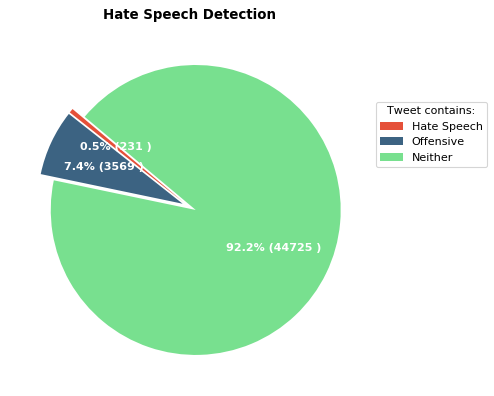

In [52]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df.Class.value_counts()[-1], df.Class.value_counts()[1], df.Class.value_counts()[0]]
categories = ['Hate Speech', 'Offensive', 'Neither']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Tweet contains:", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Hate Speech Detection", fontsize=12, fontweight="bold")
plt.show()

#### Histogram

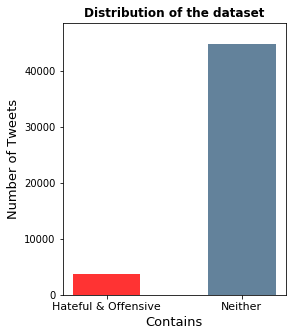

In [53]:
labels = ['Hateful & Offensive', 'Neither']
freq = [df.Class.value_counts()[-1] + df.Class.value_counts()[1], df.Class.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(4,5))
plt.bar(index, freq, alpha=0.8, width=0.5, color=['red','#3c6382','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Distribution of the dataset", fontsize=12, fontweight="bold")
plt.ylim(0, len(df['tweet_text']))
plt.show()

In [54]:
labels = ['Hate Speech', 'Offensive Language']
freq1 = [df.Class.value_counts()[-1], df.Class.value_counts()[1]]
index1 = np.arange(len(freq1))

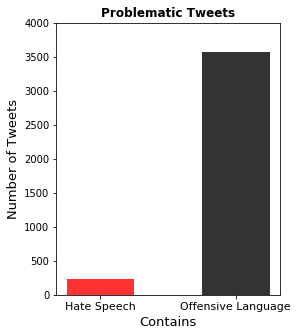

In [55]:
plt.figure(figsize=(4,5))
plt.bar(index1, freq1, alpha=0.8, width=0.5, color=['red','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Problematic Tweets", fontsize=12, fontweight="bold")
plt.ylim(0, 4000)
plt.show()

#### Seperate the dataset accordingly to contining hateful speech, offensive language and neither

In [56]:
df_hate = df[df['Class']=='hate_speech']
df_offensive = df[df['Class']=='offensive_language']
df_neither = df[df['Class']=='neither']

In [104]:
df_neither.sentiment.value_counts()

 1    19336
-1    17683
 0     7707
Name: sentiment, dtype: int64

In [69]:
df_offensive.sentiment.value_counts()

-1    2089
 1    1106
 0     375
Name: sentiment, dtype: int64

In [107]:
7707/(19336+17683+7707)

0.17231587890712338

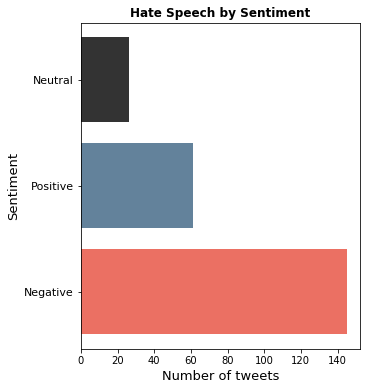

In [58]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_hate.sentiment.value_counts()[-1], df_hate.sentiment.value_counts()[1], df_hate.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 1: Sentiment of Tweets classified as Hateful
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Hate Speech by Sentiment", fontsize=12, fontweight="bold")
plt.show()

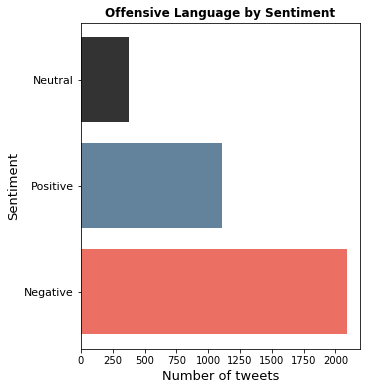

In [59]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_offensive.sentiment.value_counts()[-1], df_offensive.sentiment.value_counts()[1], df_offensive.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 2: Sentiment of Tweets classified as Offensive
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Offensive Language by Sentiment", fontsize=12, fontweight="bold")
plt.show()

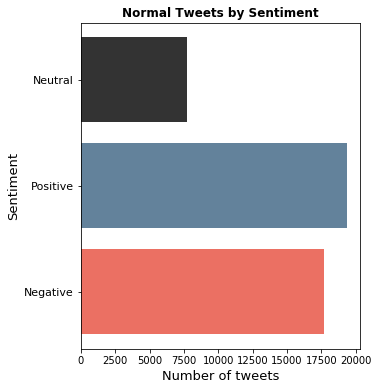

In [60]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_neither.sentiment.value_counts()[-1], df_neither.sentiment.value_counts()[1], df_neither.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 3: Sentiment of Tweets classified as Neither
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Normal Tweets by Sentiment", fontsize=12, fontweight="bold")
plt.show()

#### Scatter Plot of Hate Score

<Figure size 1440x360 with 0 Axes>

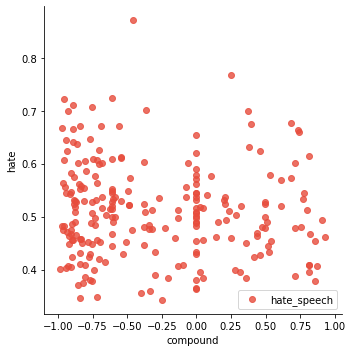

In [61]:
# Provide a dictionary to the palette argument
plt.figure(figsize=(20,5))
sns.lmplot( x="compound", y="hate", data=df_hate, fit_reg=False, hue='Class', legend=False, palette=dict(neither="black", offensive_language="#3c6382", hate_speech="#e74c3c"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

#### Top 10 Hateful Tweets

In [114]:
df_hate.sort_values('hate', inplace=True, ascending=False)

In [115]:
df_hate.reset_index(drop=True, inplace=True)

In [116]:
df_hate.head(10)

,tweet_text,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,"@ WritersofColour ""your religion is misogynist...",0.273,0.727,0.000,-0.4588,-1,hate_speech,0.870408,0.069669,0.059924
1,"@ BlushingGiraffe White is a race, anyone can ...",0.156,0.596,0.248,0.2509,1,hate_speech,0.767149,0.061211,0.171641
2,I don't know where White Racist Americans get ...,0.174,0.826,0.000,-0.6124,-1,hate_speech,0.724897,0.212712,0.062391
3,"Your baby is ugly, your life is ugly, your sha...",0.414,0.586,0.000,-0.9565,-1,hate_speech,0.721625,0.181148,0.097227
4,Hate is the new religion of some white folks. ...,0.456,0.463,0.081,-0.8934,-1,hate_speech,0.709896,0.160303,0.129802
5,Niggas whip is going to be shittin on your nig...,0.418,0.455,0.127,-0.7506,-1,hate_speech,0.706653,0.292359,0.000988
6,How awake are you? Level 4: White Nationalism ...,0.207,0.657,0.136,-0.3612,-1,hate_speech,0.701517,0.261230,0.037254
7,The majority of American Jews are of white Eur...,0.000,0.855,0.145,0.3724,1,hate_speech,0.699957,0.104922,0.195121
8,"@ ShaunKing: ""A blanket ban based on race or r...",0.491,0.509,0.000,-0.9262,-1,hate_speech,0.699675,0.095535,0.204790
9,Welcome to the white boys club Where your reli...,0.098,0.693,0.209,0.6808,1,hate_speech,0.676426,0.258803,0.064771


#### Top 10 Offensive Tweets

In [122]:
df_offensive.sort_values('offensive',inplace=True, ascending=False)

In [123]:
df_offensive.reset_index(drop=True, inplace=True)

In [124]:
df_offensive.head(10)

,tweet_text,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,"dustin speaking ""son of a bitch"" is my religion",0.388,0.612,0.000,-0.5859,-1,offensive_language,0.010516,0.989317,0.000167
1,"Anja Nissen saying ""vegan bitches!"" in her las...",0.000,1.000,0.000,0.0000,0,offensive_language,0.009915,0.989315,0.000770
2,"No more drugs for me, pussy n religion is all ...",0.216,0.784,0.000,-0.2960,-1,offensive_language,0.011703,0.987489,0.000808
3,whatever (if any) religion is right i’m fighti...,0.223,0.777,0.000,-0.7430,-1,offensive_language,0.016037,0.983680,0.000284
4,# hebrew Religions sex teen pussy porn of is i...,0.000,1.000,0.000,0.0000,0,offensive_language,0.016098,0.982518,0.001385
5,Iont know how chicks think pussy is the most p...,0.000,0.838,0.162,0.4754,1,offensive_language,0.020820,0.979173,0.000006
6,i need a religion to follow i swear to god tha...,0.365,0.541,0.095,-0.7178,-1,offensive_language,0.019817,0.977996,0.002187
7,"Hippy bitches sending me titty pictures, she t...",0.357,0.643,0.000,-0.7269,-1,offensive_language,0.018234,0.973176,0.008590
8,@ LdeRothschild There is no Religion that Has ...,0.459,0.541,0.000,-0.8979,-1,offensive_language,0.027006,0.972236,0.000759
9,like idk if that's islamophobia jumping out or...,0.305,0.550,0.144,-0.8367,-1,offensive_language,0.028679,0.969676,0.001645


#### Trying on Specific Tweets

In [125]:
list(sonar.ping(text=df.tweet_text.iloc[189]).values())


['Listening to Love Is My Religion by Ziggy Marley # nowplaying @ JamalDajani @ Kpooradio @ Kpootweets http://grooveshark.com/s/Love+Is+My+Religion/1liWTY?src=5 … via @ grooveshark',
 'neither',
 [{'class_name': 'hate_speech', 'confidence': 0.0371948899813705},
  {'class_name': 'offensive_language', 'confidence': 0.26891960234698886},
  {'class_name': 'neither', 'confidence': 0.6938855076716407}]]

In [126]:
sonar.ping(text="At least I'm not a nigger")

{'text': "At least I'm not a nigger",
 'top_class': 'hate_speech',
 'classes': [{'class_name': 'hate_speech', 'confidence': 0.6043278155427668},
  {'class_name': 'offensive_language', 'confidence': 0.395427373894216},
  {'class_name': 'neither', 'confidence': 0.0002448105630171915}]}

#### Saving Results

In [27]:
df.drop(['negative', 'neutral', 'positive', 'compound', 'sentiment'], axis=1, inplace=True)
df.to_pickle('hate_speech_results.pkl')

# END